       FBG1      FBG2      FBG3    Strain  Temperature
0  0.374540  0.950714  0.731994  7.367187     5.814632
1  0.598658  0.156019  0.155995  2.507046     1.877922
2  0.058084  0.866176  0.601115  5.788628     4.699857
3  0.708073  0.020584  0.969910  6.190852     5.000925
4  0.832443  0.212339  0.181825  3.332222     2.447430

--- Model A: FBG1 + FBG2 ---
Intercept (β0): [2.46039755 1.9525163 ]
Coefficients (βi): [[1.99824111 3.02601298]
 [1.50904207 2.53027618]]
R² Score: 0.37663487944474333
MSE: 1.7311374244040352

--- Model B: FBG1 + FBG2 + FBG3 ---
Intercept (β0): [ 0.00645211 -0.01782759]
Coefficients (βi): [[1.99610339 2.99987671 4.99364634]
 [1.50732563 2.50929061 4.0095433 ]]
R² Score: 0.9957571233215868
MSE: 0.011135515824855804


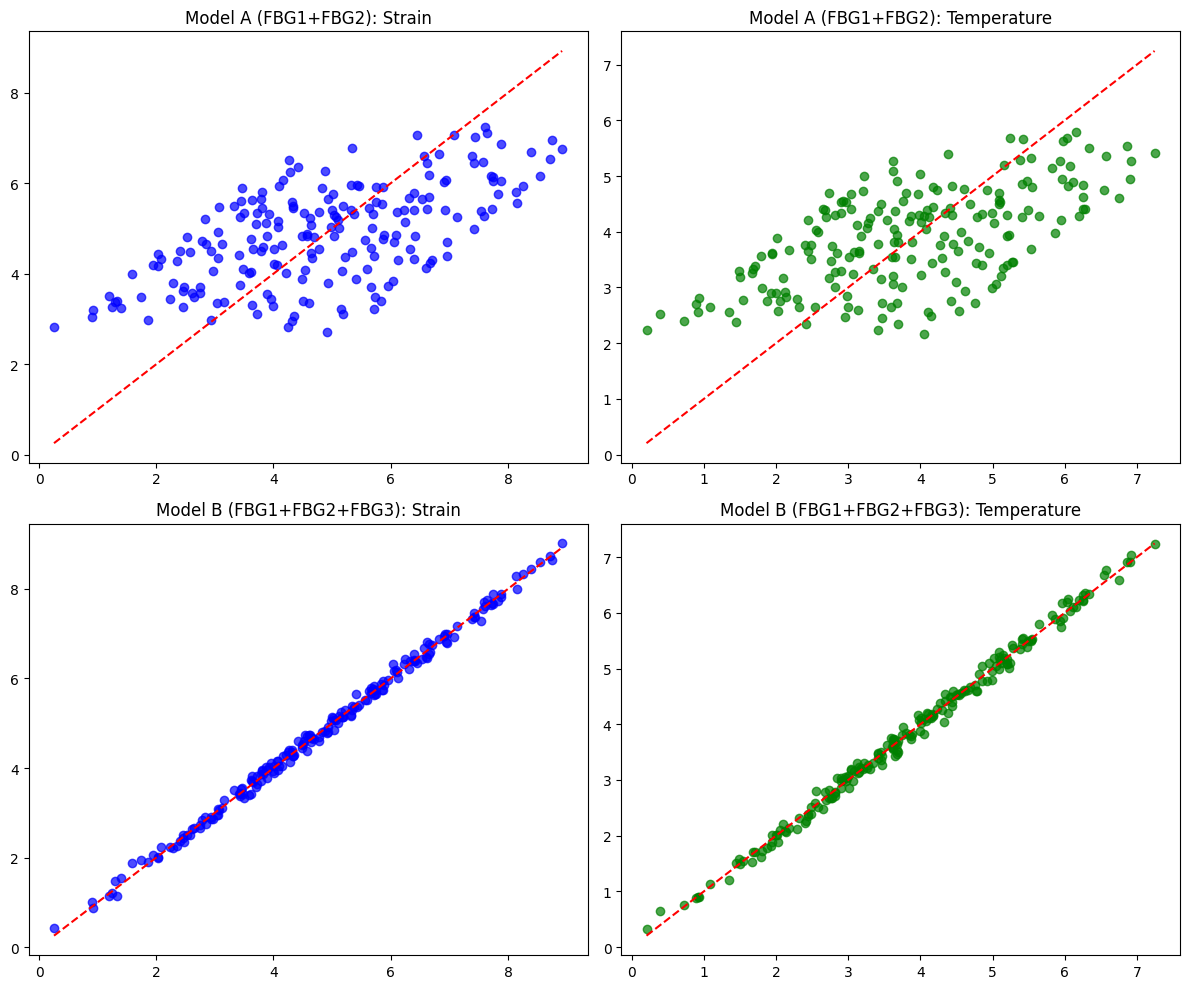

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("fbg_sensor_strain_temperature_data.csv")
print(data.head())

# -------------------------------
# Model A: FBG1 + FBG2
# -------------------------------
X_A = data[['FBG1', 'FBG2']]
y = data[['Strain', 'Temperature']]

X_train_A, X_test_A, y_train, y_test = train_test_split(X_A, y, test_size=0.2, random_state=42)

model_A = LinearRegression()
model_A.fit(X_train_A, y_train)

y_pred_A = model_A.predict(X_test_A)

print("\n--- Model A: FBG1 + FBG2 ---")
print("Intercept (β0):", model_A.intercept_)
print("Coefficients (βi):", model_A.coef_)
print("R² Score:", r2_score(y_test, y_pred_A))
print("MSE:", mean_squared_error(y_test, y_pred_A))

# -------------------------------
# Model B: FBG1 + FBG2 + FBG3
# -------------------------------
X_B = data[['FBG1', 'FBG2', 'FBG3']]

X_train_B, X_test_B, y_train, y_test = train_test_split(X_B, y, test_size=0.2, random_state=42)

model_B = LinearRegression()
model_B.fit(X_train_B, y_train)

y_pred_B = model_B.predict(X_test_B)

print("\n--- Model B: FBG1 + FBG2 + FBG3 ---")
print("Intercept (β0):", model_B.intercept_)
print("Coefficients (βi):", model_B.coef_)
print("R² Score:", r2_score(y_test, y_pred_B))
print("MSE:", mean_squared_error(y_test, y_pred_B))

# -------------------------------
# Visualization: Predicted vs Actual
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Model A - Strain
axs[0,0].scatter(y_test['Strain'], y_pred_A[:,0], alpha=0.7, color="blue")
axs[0,0].plot([y_test['Strain'].min(), y_test['Strain'].max()],
            [y_test['Strain'].min(), y_test['Strain'].max()],
            color="red", linestyle="--")
axs[0,0].set_title("Model A (FBG1+FBG2): Strain")

# Model A - Temperature
axs[0,1].scatter(y_test['Temperature'], y_pred_A[:,1], alpha=0.7, color="green")
axs[0,1].plot([y_test['Temperature'].min(), y_test['Temperature'].max()],
            [y_test['Temperature'].min(), y_test['Temperature'].max()],
            color="red", linestyle="--")
axs[0,1].set_title("Model A (FBG1+FBG2): Temperature")

# Model B - Strain
axs[1,0].scatter(y_test['Strain'], y_pred_B[:,0], alpha=0.7, color="blue")
axs[1,0].plot([y_test['Strain'].min(), y_test['Strain'].max()],
            [y_test['Strain'].min(), y_test['Strain'].max()],
            color="red", linestyle="--")
axs[1,0].set_title("Model B (FBG1+FBG2+FBG3): Strain")

# Model B - Temperature
axs[1,1].scatter(y_test['Temperature'], y_pred_B[:,1], alpha=0.7, color="green")
axs[1,1].plot([y_test['Temperature'].min(), y_test['Temperature'].max()],
            [y_test['Temperature'].min(), y_test['Temperature'].max()],
            color="red", linestyle="--")
axs[1,1].set_title("Model B (FBG1+FBG2+FBG3): Temperature")

plt.tight_layout()
plt.show()


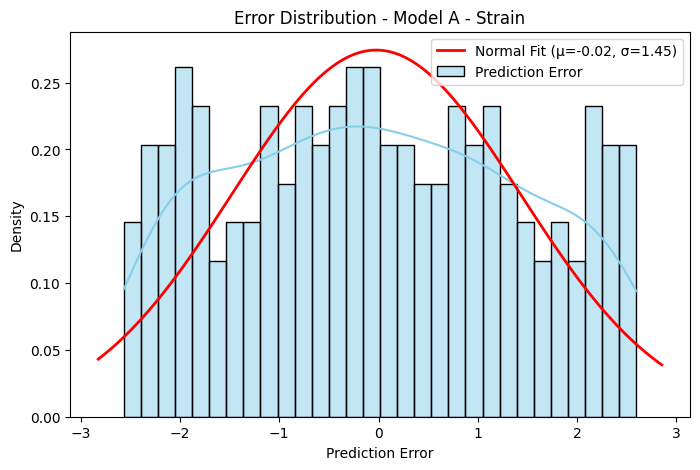

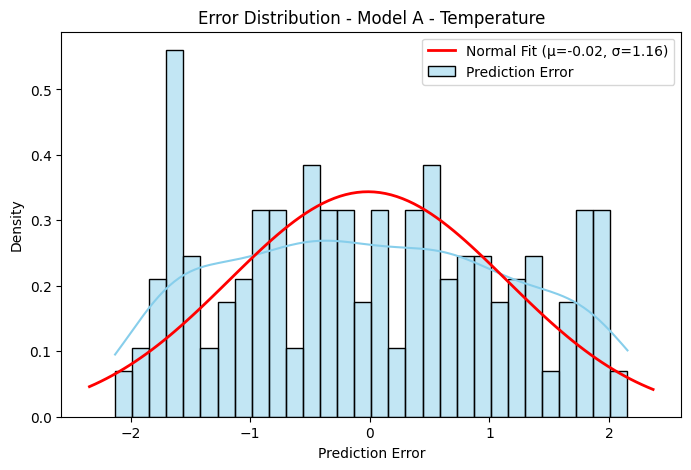

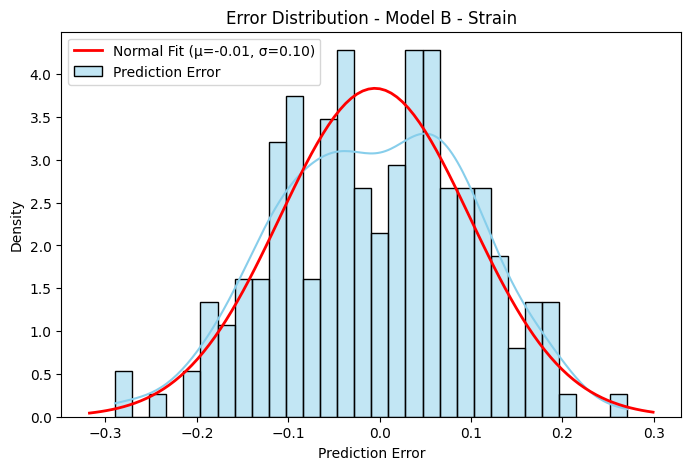

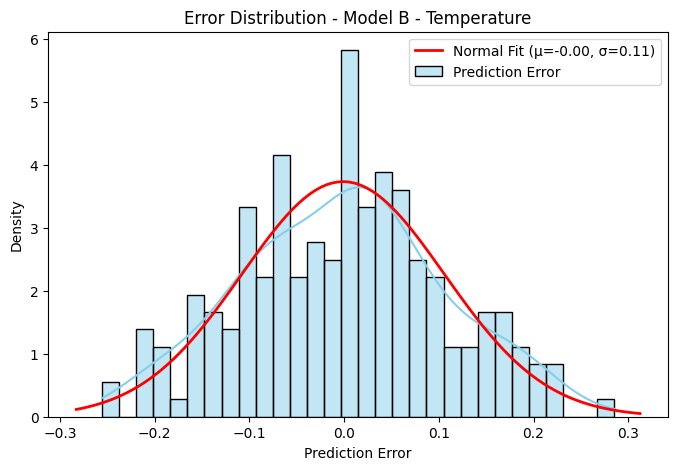

In [7]:
import seaborn as sns
from scipy.stats import norm

# Function to plot error distribution
def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred  # prediction error
    
    plt.figure(figsize=(8,5))
    # Histogram + KDE
    sns.histplot(errors, bins=30, kde=True, stat="density", color="skyblue", label="Prediction Error")
    
    # Fit a normal distribution (mean & std)
    mu, std = norm.fit(errors)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Plot fitted normal curve
    plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit (μ={mu:.2f}, σ={std:.2f})")
    
    plt.title(f"Error Distribution - {title}")
    plt.xlabel("Prediction Error")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# --- Model A ---
plot_error_distribution(y_test['Strain'], y_pred_A[:,0], "Model A - Strain")
plot_error_distribution(y_test['Temperature'], y_pred_A[:,1], "Model A - Temperature")

# --- Model B ---
plot_error_distribution(y_test['Strain'], y_pred_B[:,0], "Model B - Strain")
plot_error_distribution(y_test['Temperature'], y_pred_B[:,1], "Model B - Temperature")


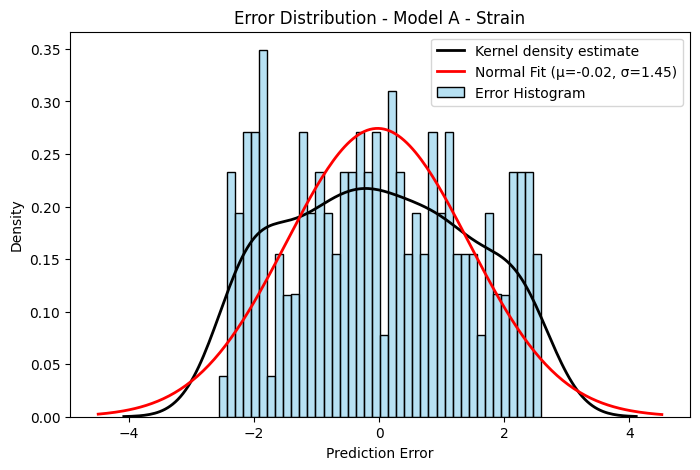

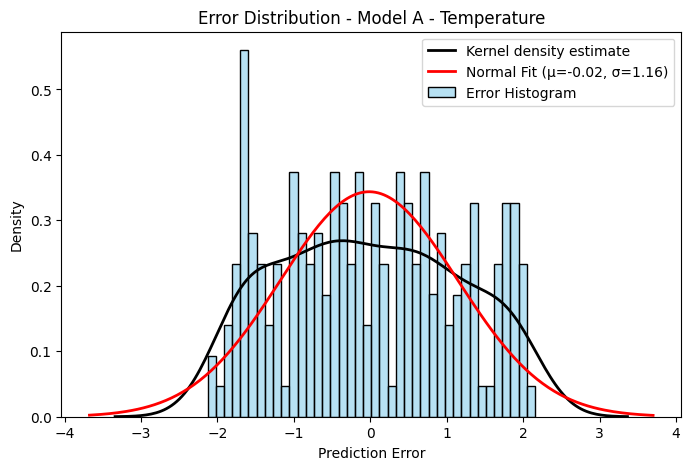

In [8]:
import seaborn as sns
from scipy.stats import norm

def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred  # residuals

    plt.figure(figsize=(8,5))
    
    # Histogram (normalized to density)
    sns.histplot(errors, bins=40, kde=False, stat="density", 
                 color="skyblue", edgecolor="black", alpha=0.6, label="Error Histogram")

    # Kernel Density Estimate (smooth curve)
    sns.kdeplot(errors, color="black", linewidth=2, label="Kernel density estimate")

    # Normal distribution fit (red curve)
    mu, std = norm.fit(errors)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 200)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, "r", linewidth=2, label=f"Normal Fit (μ={mu:.2f}, σ={std:.2f})")

    # Labels & legend
    plt.title(f"Error Distribution - {title}")
    plt.xlabel("Prediction Error")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Example calls:
plot_error_distribution(y_test['Strain'], y_pred_A[:,0], "Model A - Strain")
plot_error_distribution(y_test['Temperature'], y_pred_A[:,1], "Model A - Temperature")


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'data' is a DataFrame with columns 'FBG1', 'FBG2', 'FBG3' and 'y' is a DataFrame with columns 'Strain' and 'Temperature'
X_B = data[['FBG1', 'FBG2', 'FBG3']]
y_strain = y['Strain']  # Target variable for strain
y_temperature = y['Temperature']  # Target variable for temperature

# Split data for strain
X_train_B_strain, X_test_B_strain, y_train_strain, y_test_strain = train_test_split(
    X_B, y_strain, test_size=0.2, random_state=42
)

# Split data for temperature
X_train_B_temp, X_test_B_temp, y_train_temp, y_test_temp = train_test_split(
    X_B, y_temperature, test_size=0.2, random_state=42
)

# Model for strain
model_B_strain = LinearRegression()
model_B_strain.fit(X_train_B_strain, y_train_strain)
y_pred_B_strain = model_B_strain.predict(X_test_B_strain)

# Model for temperature
model_B_temp = LinearRegression()
model_B_temp.fit(X_train_B_temp, y_train_temp)
y_pred_B_temp = model_B_temp.predict(X_test_B_temp)

# Print results for strain
print("\n--- Model B: Strain Prediction using (FBG1 + FBG2 + FBG3) ---")
print("Intercept (β0):", model_B_strain.intercept_)
print("Coefficients (βi):", model_B_strain.coef_)
print("R² Score:", r2_score(y_test_strain, y_pred_B_strain))
print("MSE:", mean_squared_error(y_test_strain, y_pred_B_strain))

# Print results for temperature
print("\n--- Model B: Temperature Prediction using  (FBG1 + FBG2 + FBG3) ---")
print("Intercept (β0):", model_B_temp.intercept_)
print("Coefficients (βi):", model_B_temp.coef_)
print("R² Score:", r2_score(y_test_temp, y_pred_B_temp))
print("MSE:", mean_squared_error(y_test_temp, y_pred_B_temp))


--- Model B: Strain Prediction using (FBG1 + FBG2 + FBG3) ---
Intercept (β0): 0.006452109763068314
Coefficients (βi): [1.99610339 2.99987671 4.99364634]
R² Score: 0.9968072836333522
MSE: 0.010856302165694135

--- Model B: Temperature Prediction using  (FBG1 + FBG2 + FBG3) ---
Intercept (β0): -0.017827586364146608
Coefficients (βi): [1.50732563 2.50929061 4.0095433 ]
R² Score: 0.9947069630098214
MSE: 0.01141472948401747
